In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
import pandas as pd
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 120

In [3]:
cd ..

/home/shibinbin/ibme/projects/DeepShape


In [29]:
summary = pd.read_table('output/pwm/summary/summarize_evaluate_hits.txt')
summary.head()

,accuracy,bg_percent,method,motif_id,n_seq,overlap_mean,overlap_std,precision,recall,seq_length
0,0.270,0,jaspar,MA0745.1,1000,0.953840,0.207382,1.0,0.270,128
1,0.394,0,meme,MA0745.1,1000,0.843230,0.361504,1.0,0.394,128
2,0.510,0,homer,MA0745.1,1000,0.699896,0.232897,1.0,0.510,128
3,0.759,0,mixture_pwm,MA0745.1,1000,0.943347,0.229352,1.0,0.759,128
4,0.455,0,mixture_vae,MA0745.1,1000,0.664469,0.293084,1.0,0.455,128


In [30]:
summary_by_bg_percent = summary.groupby(['method', 'n_seq', 'seq_length', 'bg_percent'], as_index=False).mean()
summary_by_bg_percent

,method,n_seq,seq_length,bg_percent,accuracy,overlap_mean,overlap_std,precision,recall
0,homer,1000,128,0,0.72535,0.874381,0.209388,1.000000,0.725350
1,homer,1000,128,10,0.70495,0.845544,0.187581,0.983218,0.677111
2,homer,1000,128,20,0.75445,0.901151,0.182296,0.980901,0.703687
3,homer,1000,128,30,0.76550,0.895581,0.187741,0.977115,0.677000
4,homer,1000,128,40,0.77330,0.887759,0.184461,0.949678,0.646750
5,homer,1000,128,50,0.82585,0.905598,0.183067,0.941047,0.687900
6,jaspar,1000,128,0,0.48300,0.949302,0.181114,1.000000,0.483000
7,jaspar,1000,128,10,0.53155,0.954359,0.174803,0.994882,0.480667
8,jaspar,1000,128,20,0.57895,0.961472,0.164557,0.984173,0.477625
9,jaspar,1000,128,30,0.63430,0.944989,0.179098,0.977417,0.481643


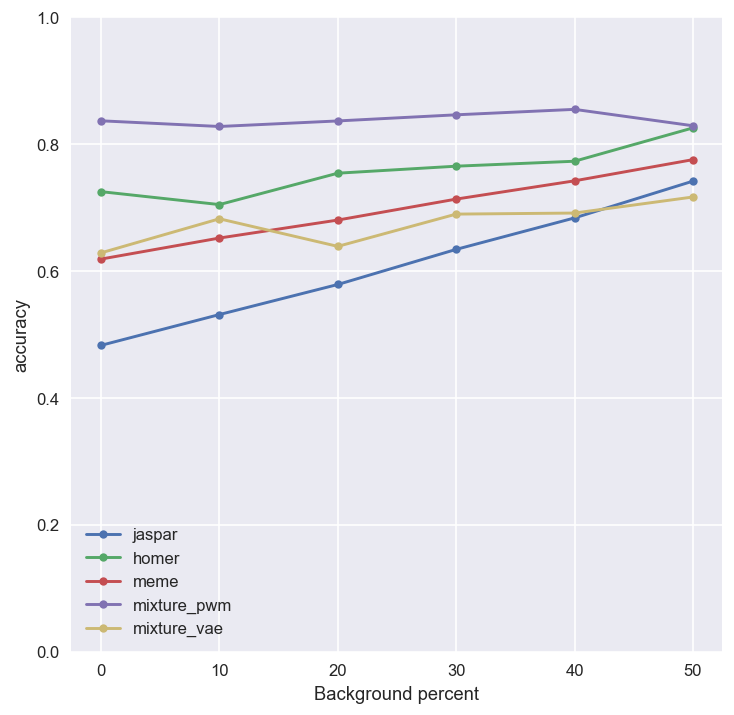

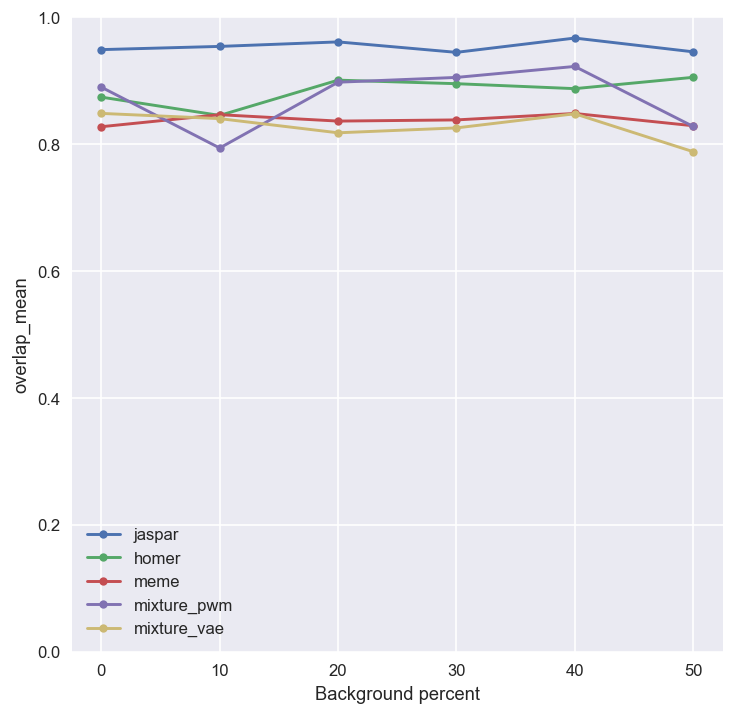

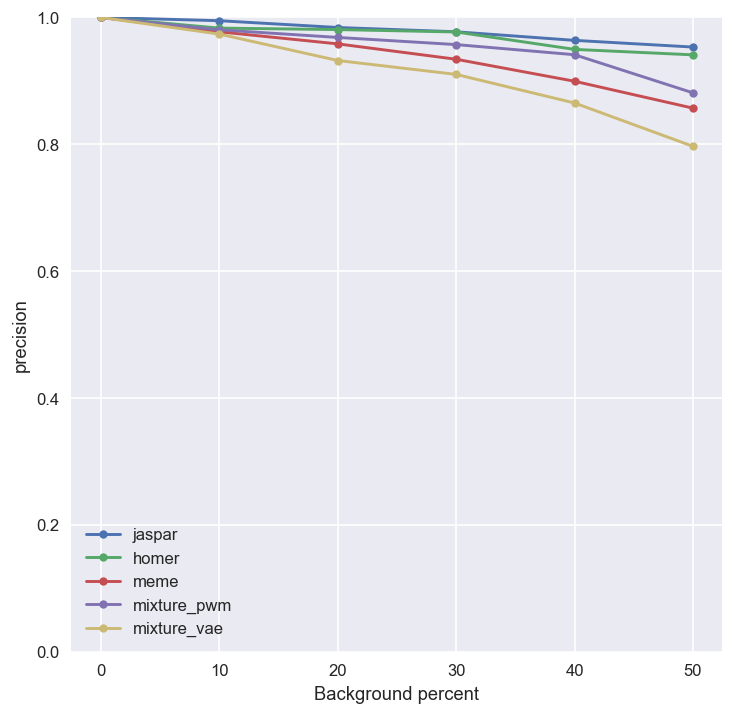

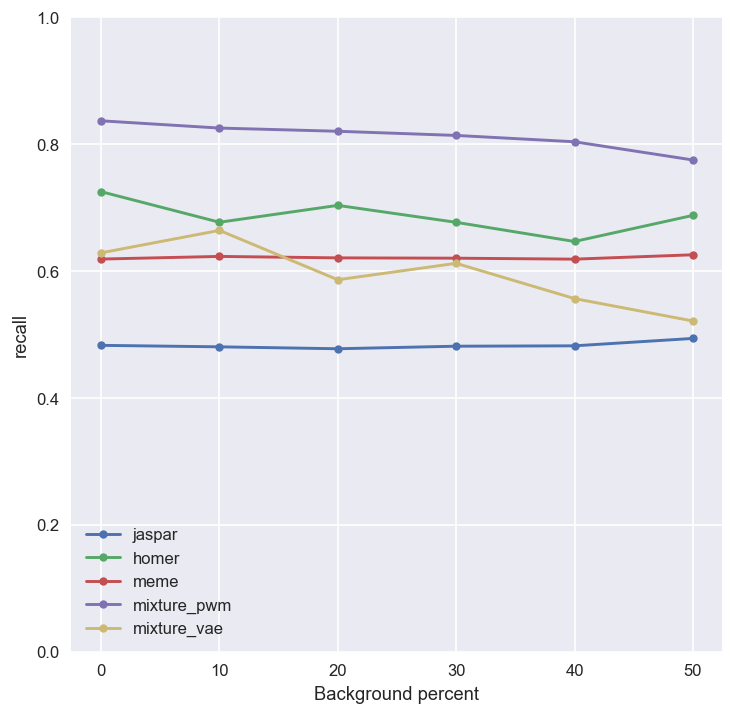

In [31]:
bg_percents = [0, 10, 20, 30, 40, 50]
for metric in ['accuracy', 'overlap_mean', 'precision', 'recall']:
    fig, ax = plt.subplots(figsize=(7, 7))
    for method in ['jaspar', 'homer', 'meme', 'mixture_pwm', 'mixture_vae']:
        df = summary_by_bg_percent.query('method == "{}"'.format(method))
        ax.plot(df['bg_percent'], df[metric], marker='.', markersize=10, label=method)
    ax.set_ylim(0, 1)
    ax.set_ylabel(metric)
    ax.set_xlabel('Background percent')
    ax.legend()